# Backpropagation Basics
---

> This post makes use of notation and general concepts introducted in Chapter 4 of Christopher Bishop's seminal textbook: "Neural Networks for Pattern Recognition." Readers interested in building deeper intution of the capabilities and limitations of neural networks–as well as the governing mathematics of machine learning will benefit enoromously from a review of this classic treatment.

In our last blog post, we learned about the expressive power of **Multi-Layer Perceptions** (MLPs): feed-forward networks parameterized by weights and bias terms that apply sequential linear transformations to an input vector $\mathbf{x}$, with non-linear activation functions used at the output of each hidden layer. These remarkable models form an integral part of all modern deep learning architectures. But an MLP with randomly initialized parameters is completely useless to us, regardless of the structure, depth, and topology of the network. We want a highly general learning algorithm that applies to many different types of datasets, runs efficiently on modern computers, and learns to update model parameters using examples, opperating without oversight or instruction. 

This brings us to the topic of **Backpropagation**: an efficient method for calculating the gradients of a neural network with respect to a loss function. Today, we will outline the high-level concepts and formal math underpining Backpropagation. In future posts, this foundation will allow us to analyize more complex methods of solving the so-called *credit assingment problem*, such as those leveraging paralleization or approximations. For now, all we ask is that the reader is familar with the basics of calculus–particularly gradients of multivariate functions and nested functions.

Now, let's get reaquianted with some notation from previous posts. Recall that a multi-layer net $\text{MLP}(\mathbf{x}) \mapsto \mathbf{y}$ maps an input vector $\mathbf{x} = [x_1, x_2, \dots, x_d]$ to an output vector $\mathbf{y} = [y_1, y_2, \dots, y_k]$. This model is composed of some number of "hidden" layers applied sequentially to the input sequence. For a hidden layer containing $j$ individual neurons, the **pre-activation** $a_j$ of a unit determined by the previous layer's **activations** $z_i$ can be expressed as

$$
a_j = \sum_i w_{ji}z_i + b_i.
$$

Here, $z_i = g(a_i)$, where $g(\cdot)$ is an **activation function** (e.g., tanh) and $b$ is a bias term. In previous posts, we introduced a neat notational trick that allows us to subsume $b_i$ into a weight vector $\mathbf{w}$, allowing us to cleanly visualize the first layer of an MLP like so.

<div align="center">
<img src="assets/img/ml-concepts/backprop/mlp_preact.png"style="max-height: 500px;" />
</div>

To set the parameters of any neural network, it is critical that we first formalized a model's ideal behavior. An **error function** $E$, (also refered to as a **loss function** or **objective function**) provides an objective measure of the quality of model's predictions. Another way to think of the value $E$ is as a **score**, which we sometimes want to maximize and sometimes wish to minize depending upon the task at hand. To take a concrete example, say our model took as input Apple's ticker price from the previous week $\mathbf{x}_{\text{apple}}$, and predicted as output share prices over the next week $\mathbf{y}_{\text{pred}}$. We could define a simple **mean squared error** (MSE) function for a model, where lower errors indicate better predictions.

$$
E_{\text{apple}} = \sqrt{(\mathbf{y}_{\text{pred}} - \mathbf{y}_{\text{actual}})^2}
$$

For reasons that we won't get into today, MSE satisfies the basic criteria required of all error functions. Namely, it is convex and differentiable at all points. Also importantly, it penalizes model that provide incorrect predictions, and rewards models whose outputs are closer to the ground truth. Let's ammend our previous visualization of an MLP to include this error function, which is always applied after the **forward pass** of a model propogates to the activations of it's output layer.

<div align="center">
<img src="assets/img/ml-concepts/backprop/mlp_w_error.png"style="max-height: 500px;" />
</div>

1. credit attribution; calculating change in error wrt all parameters
2. 


---

Recall that an MLP and indeed all neural networks can be expressed in formal mathematical notation; consider the general forumla for a network with one hidden layer using the tanh activation function:

1. error functions
    - L2; RSME; sum of least squares
2. motivation for an optimization proceedure for hidden units
    - "credit assignment problem"
    - when entire network is differentiable, can calculate change in loss wrt to change in any weight/bias term (derivative).
3. backprop: algo that finds partials of weights wrt loss
    - "computationally efficient method for calculating grads"


want to calculate:

$$
\frac{\partial E^{n}}{\partial w_{ji}}
$$

for all weights in a model $w$ and some loss function $E$

backpropagation
1. 

---

> This post makes use of notation and general concepts introducted in Chapter 4 of Christopher Bishop's seminal textbook: "Neural Networks for Pattern Recognition." Readers interested in building deeper intution of the capabilities and limitations of neural networks–as well as the governing mathematics of machine learning will benefit enoromously from a review of this classic treatment.

Last week, we provided a brief overview of one of the basic building blocks of machine learning: the **Perceptron**. Specially, we focused on the implementation of a single-unit Perceptron trained with an adaptive weight-update algorithm. Recall that this simple model is capable of classifying any **linearly seperable** dataset, and can be defined using the following equation:

$$
  y = 
  \begin{cases} 
    +1 & \mathbf{w}^{\top} \mathbf{x} + b \geq 0 \\ 
    -1 & \text{otherwise}
  \end{cases} \text{.}           
$$

But, what about the far more common, infinitely variable world of **non-linearably seperable** datasets? What if, to accurately classify some dataset, we need to carve our input space into convext or even non-convex regions? To skillfully represent and extrapolate these data we will introduce sequential function that (1) has learnable parameters that update based on observations, and (2) has some non-linearities baked in. To that end, today we are going to build a Multi-Layer Preceptron (MLP) bit by bit–slowly modifying our original Perceptron into a much more expressive model.

Let's remember that a single-unit Perctron can be thought of as a machine that maps input vector data $\mathbf{x} \in \mathbb{R}^d$ to one of two outputs $y \in \{ -1, +1\}$ via a weight vector $\mathbf{w} \mathbb{R}^d$ and a bias term $b$. Taken from another point of view, these mathematical operations can be visualized as the activiation pattern for a single *biological* (albiet an anatomically incorrect) neuron. (For sake of elegance, we subsume the bias term $b$ in the weight vector using a trick outlined in our previous ML concepts blog.) 

<div align="center">
<img src="assets/img/ml-concepts/mlp/1_slp.png" style="max-width: 500px;" />
  <figcaption>*Here, edges connecting input values $x_i$ to corresponding weights $w_i$ represent multiplication.*</figcaption>                                     
</div>

Imagine instead that we wanted to map an input vector $\mathbf{x}^{( \ell)} $ belonging to a network layer $\ell$ not to a single, scalar output, but to another vector, call it $\mathbf{a}^{( \ell + 1)} \in \mathbb{R}^M$. We could achieve this quite simply by replacing $\mathbf{w}$ in the equation for a Perceptron with a a weight **matrix** $A \in \mathbb{R}^{d \times M}$, and calculating $\mathbf{a}^{( \ell + 1)} = A^{\top}_{(\ell + 1)} \mathbf{x}^{( \ell )} + b_{(\ell + 1)}$. This linear transformation forms part of a "layer" of a modern neural network, and can be thought of as the input signal to a grouping of aritifical "neurons".

A non-linear activiation function $g(\cdot)$ is applied to obtain the final value of a hidden state vector $\mathbb{z}^{(\ell + 1)} = g(\mathbf{a}^{( \ell + 1)})$. Once again, this added non-linearity is the secret sauce of deep learning; **neural networks can not learn non-linear mappings without non-linear activation functions**, instead they degenerate into linear transforms that could be expressed as single-layer networks! Going back to the bilogical inspiration for MLPs, activation functions determine if, and how strongly, a particular neuron "fires".

In practice, $g(\cdot)$ can be implemented many different ways, and indeed different activation functions are used at different points in a neural network. Our Perceptron model used a version of the "Heavyside" step function (a simple binary threshold). When calculating intermediate activations $\mathbf{z}$, today we will use the tanh function $g \equiv \text{tanh}(a) = \frac{e^{a} - e^{-a}}{e^{a} + e^{-a}}$. A diagram of a single neural network layer can now be drawn like so.

<div align="center">
<img src="assets/img/ml-concepts/mlp/4_mlp_no_out.png"style="max-width: 500px;" />
</div>

The first and most obvious thing that stands out about this diagram is the density of the connections between the input vector and the hidden state. Just like in our Perceptron, unless they extend to a function, edges in this graph denote multiplication of an input value $i$ by a weight $j$: $w^{( \ell + 1)}_{ji} x_i^{( \ell)}$. To extend this digram and create an MLP, all we need to do is wire up the hidden state $\mathbb{z}^{(\ell + 1)}$ to an output vector $y \in \mathbb{R}^c$. In this second layer, we first calculate values $\mathbf{a}^{( \ell + 2)} = A^{\top}_{(\ell + 2)} \mathbf{z}^{(\ell + 1)} + b_{(\ell + 2)}$. Finally we apply a separate non-linear activation function $\tilde{g}$ to obtain the network output $y = \tilde{g}(\mathbf{a}^{( \ell + 2)})$. For many applications, such as multiway classification, the softmax function $\text{softmax}(a_i) = \frac{e^{a_i}}{\sum_{j=1}^{M} e^{a_j}}$, makes a good choice for $\tilde{g}$.

<div align="center">
<img src="assets/img/ml-concepts/mlp/5_mlp_full.png" style="max-width: 500px;" />
</div>

And...we're done! We've just built out our very own Multi-Layer Perceptron! Maybe you're not excited yet, but you should be! A fully-connected, two layer neural network like the one above has the power to transform vectors of arbitrary dimensionaity to outputs of arbitrary dimensionality, to model simple non-linear functions like "XOR", and is entirely differentiable–making it well-suited for adaptive learning algorithms like Gradient Descent (which we will be exploring...next week!) Appending just one more layer, that is, expanding our two-layer network into a three-layer network, allows us to learn non-convex (oddly shaped) partitions of any classification space. Consequentially, an MLP can solve a much wider range of tasks than single-unit Perceptron. The extrodinary learning capacities of multi-layered nets become more impressive when you consider that ***practically any form of data can be represented as a vector***.

So we know our model is expressive, but how on earth do you set it's weights and therby help it to reach it's full potential? This will be the topic of next week's ML-Concepts post, where we're going to dive into Gradient Descent (maybe even SGD if the mood strikes). If you've made it this far (god bless you), thank you honestly! There are almost certainty mistakes abound in this post. When you find them, or if you just want to chat, feel free to send me an email.

See you next week!

Before continuing our discussion of MLPs, we're going to introduce an important problem that motivates the need for models capable of learning complex, non-linear dependencies. Consider a dataset of basketball players $\mathcal{D} = \{ (\mathbf{x}, \mathbf{y}) \}$, some of whom can dunk (labeled $\mathbf{y}=[1, 0]$) and some of whom can **not** dunk (labeled $\mathbf{y}=[0, 1]$). We'll describe players using two attributes (1) *is a good shooter* and (2) *is strong*. For a player $\mathbf{x} = [x1, x2]$, $x1=1/0$ and $x2=1/0$ denotes a strong/weak, good/bad shooter, respectively. Imagine that it was a law of the universe that the following chart dictated which players could/could not dunk.

| Strong? | Good shooter? | Can dunk? |
| :---: | :---: | :---: |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

This is a very silly incarnation of the classic ["exclusive OR" (XOR)](https://en.wikipedia.org/wiki/Exclusive_or) operation, and a single Perceptron, even multiple, fully connected layers can not learn to solve it.

***

Hey...wait a second. This looks like a suped-up version of the single layer Perceptron! Our diagram above illustrates a component of a neural network known as a **fully conencted layer**, which can be thought of as being composed of little perceptrons! The really powerful thing about the general equation for a fully-conneted layer is that the value of $c$ for a weight matrix $A$ can be tuned as needed to produce output vectors of any dimensionality. Say, for example, that $c=2$:

<div align="center">
<img src="assets/img/ml-concepts/mlp/3_mlp_o2.png" style="max-width: 500px;" />
</div>

---

# TODO
- Describe "hidden units" (Z_0 ... Z_M)
- Provide a formal equation for the activation of a single hidden unit
- Multilayer networks w/o non-linear activations are equivalent to a linear network; "compositions of linear transformations are themselves linear transformations"
- Define layers (L) of a network as # layers of hidden units; allude to decision boundaries

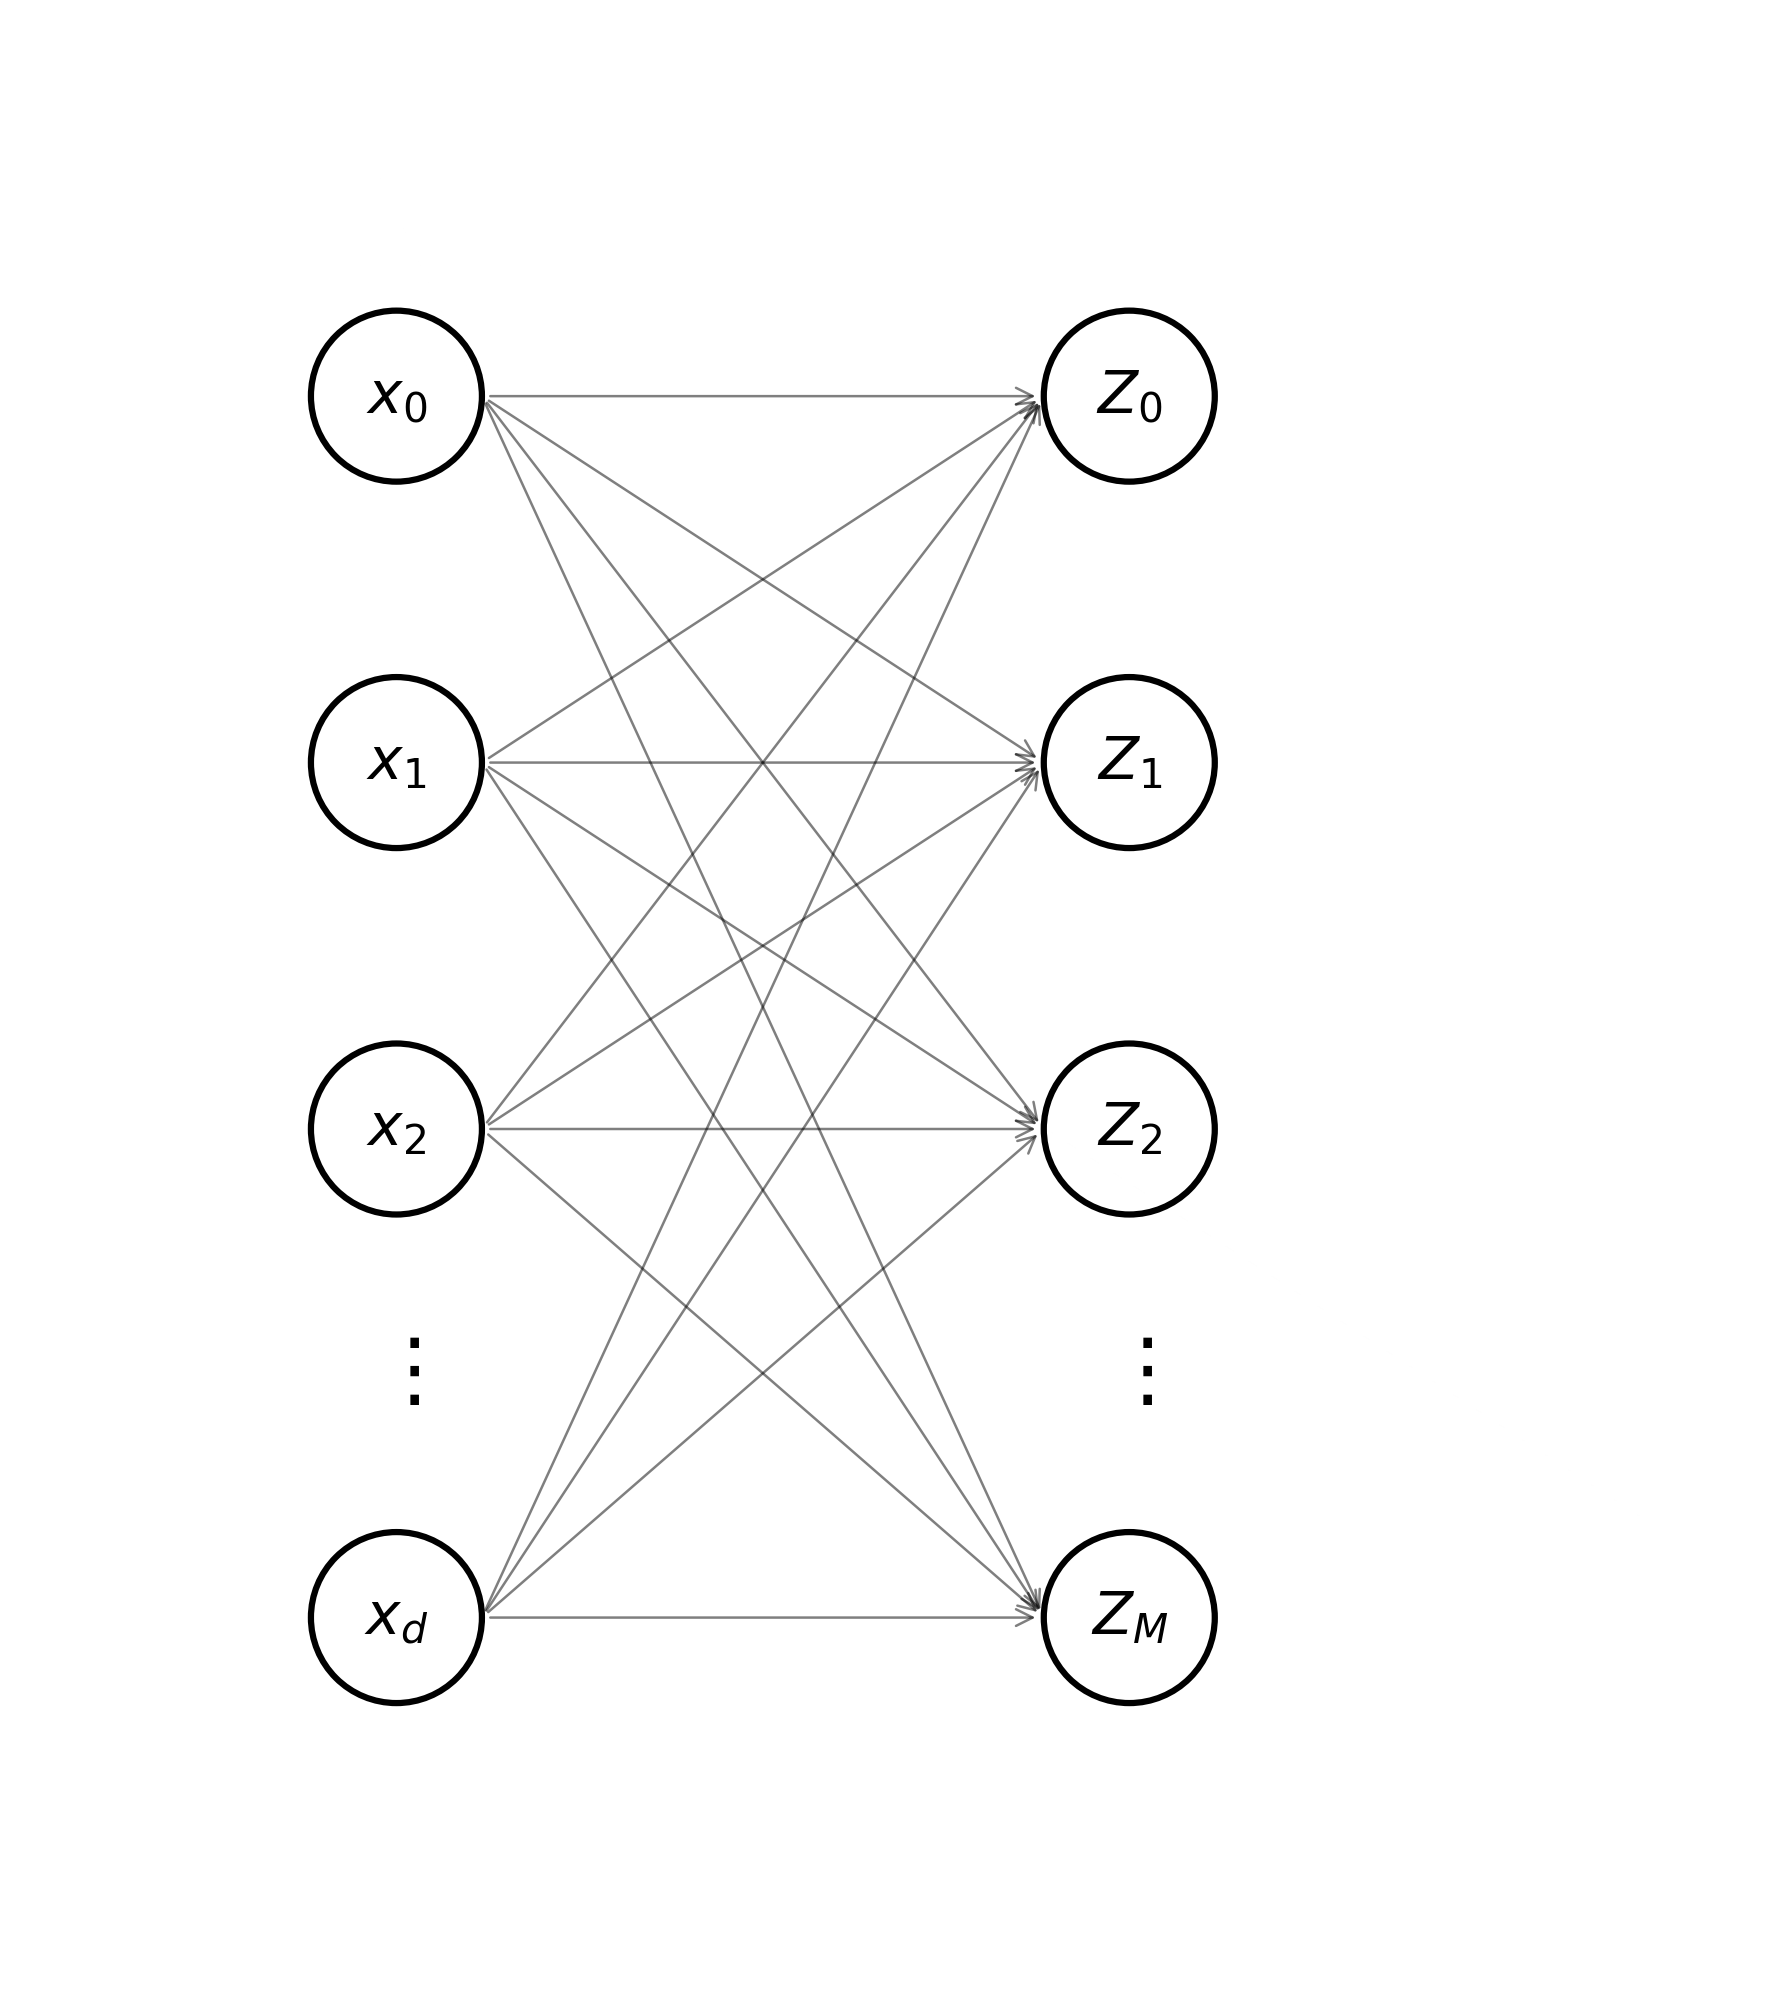

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(6, 8), dpi=300)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)
ax.set_aspect('equal')
ax.axis('off')

r = 0.35  # node radius

# --- Positions ---
input_x = 0.5
z_x = 3.5

input_ys  = [5.5, 4.0, 2.5, 0.5]   # x0, x1, x2, xd
z_ys      = [5.5, 4.0, 2.5, 0.5]   # Z0, Z1, Z2, ZM

# --- Helper: draw a circle with text ---
def draw_node(x, y, text, fontsize=14):
    circle = plt.Circle((x, y), r, fill=False, edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, text, ha='center', va='center', fontsize=fontsize, zorder=4)

# --- Draw input nodes ---
input_labels = [r'$x_0$', r'$x_1$', r'$x_2$', r'$x_d$']
for y, label in zip(input_ys, input_labels):
    draw_node(input_x, y, label)
ax.text(input_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw hidden (Z) nodes ---
z_labels = [r'$Z_0$', r'$Z_1$', r'$Z_2$', r'$Z_M$']
for y, label in zip(z_ys, z_labels):
    draw_node(z_x, y, label)
ax.text(z_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Connections: input -> Z (all-to-all, fully connected) ---
for iy in input_ys:
    for zy in z_ys:
        ax.annotate('', xy=(z_x - r, zy), xytext=(input_x + r, iy),
                    arrowprops=dict(arrowstyle='->', color='black', lw=0.6, alpha=0.5))

plt.tight_layout()
plt.show()

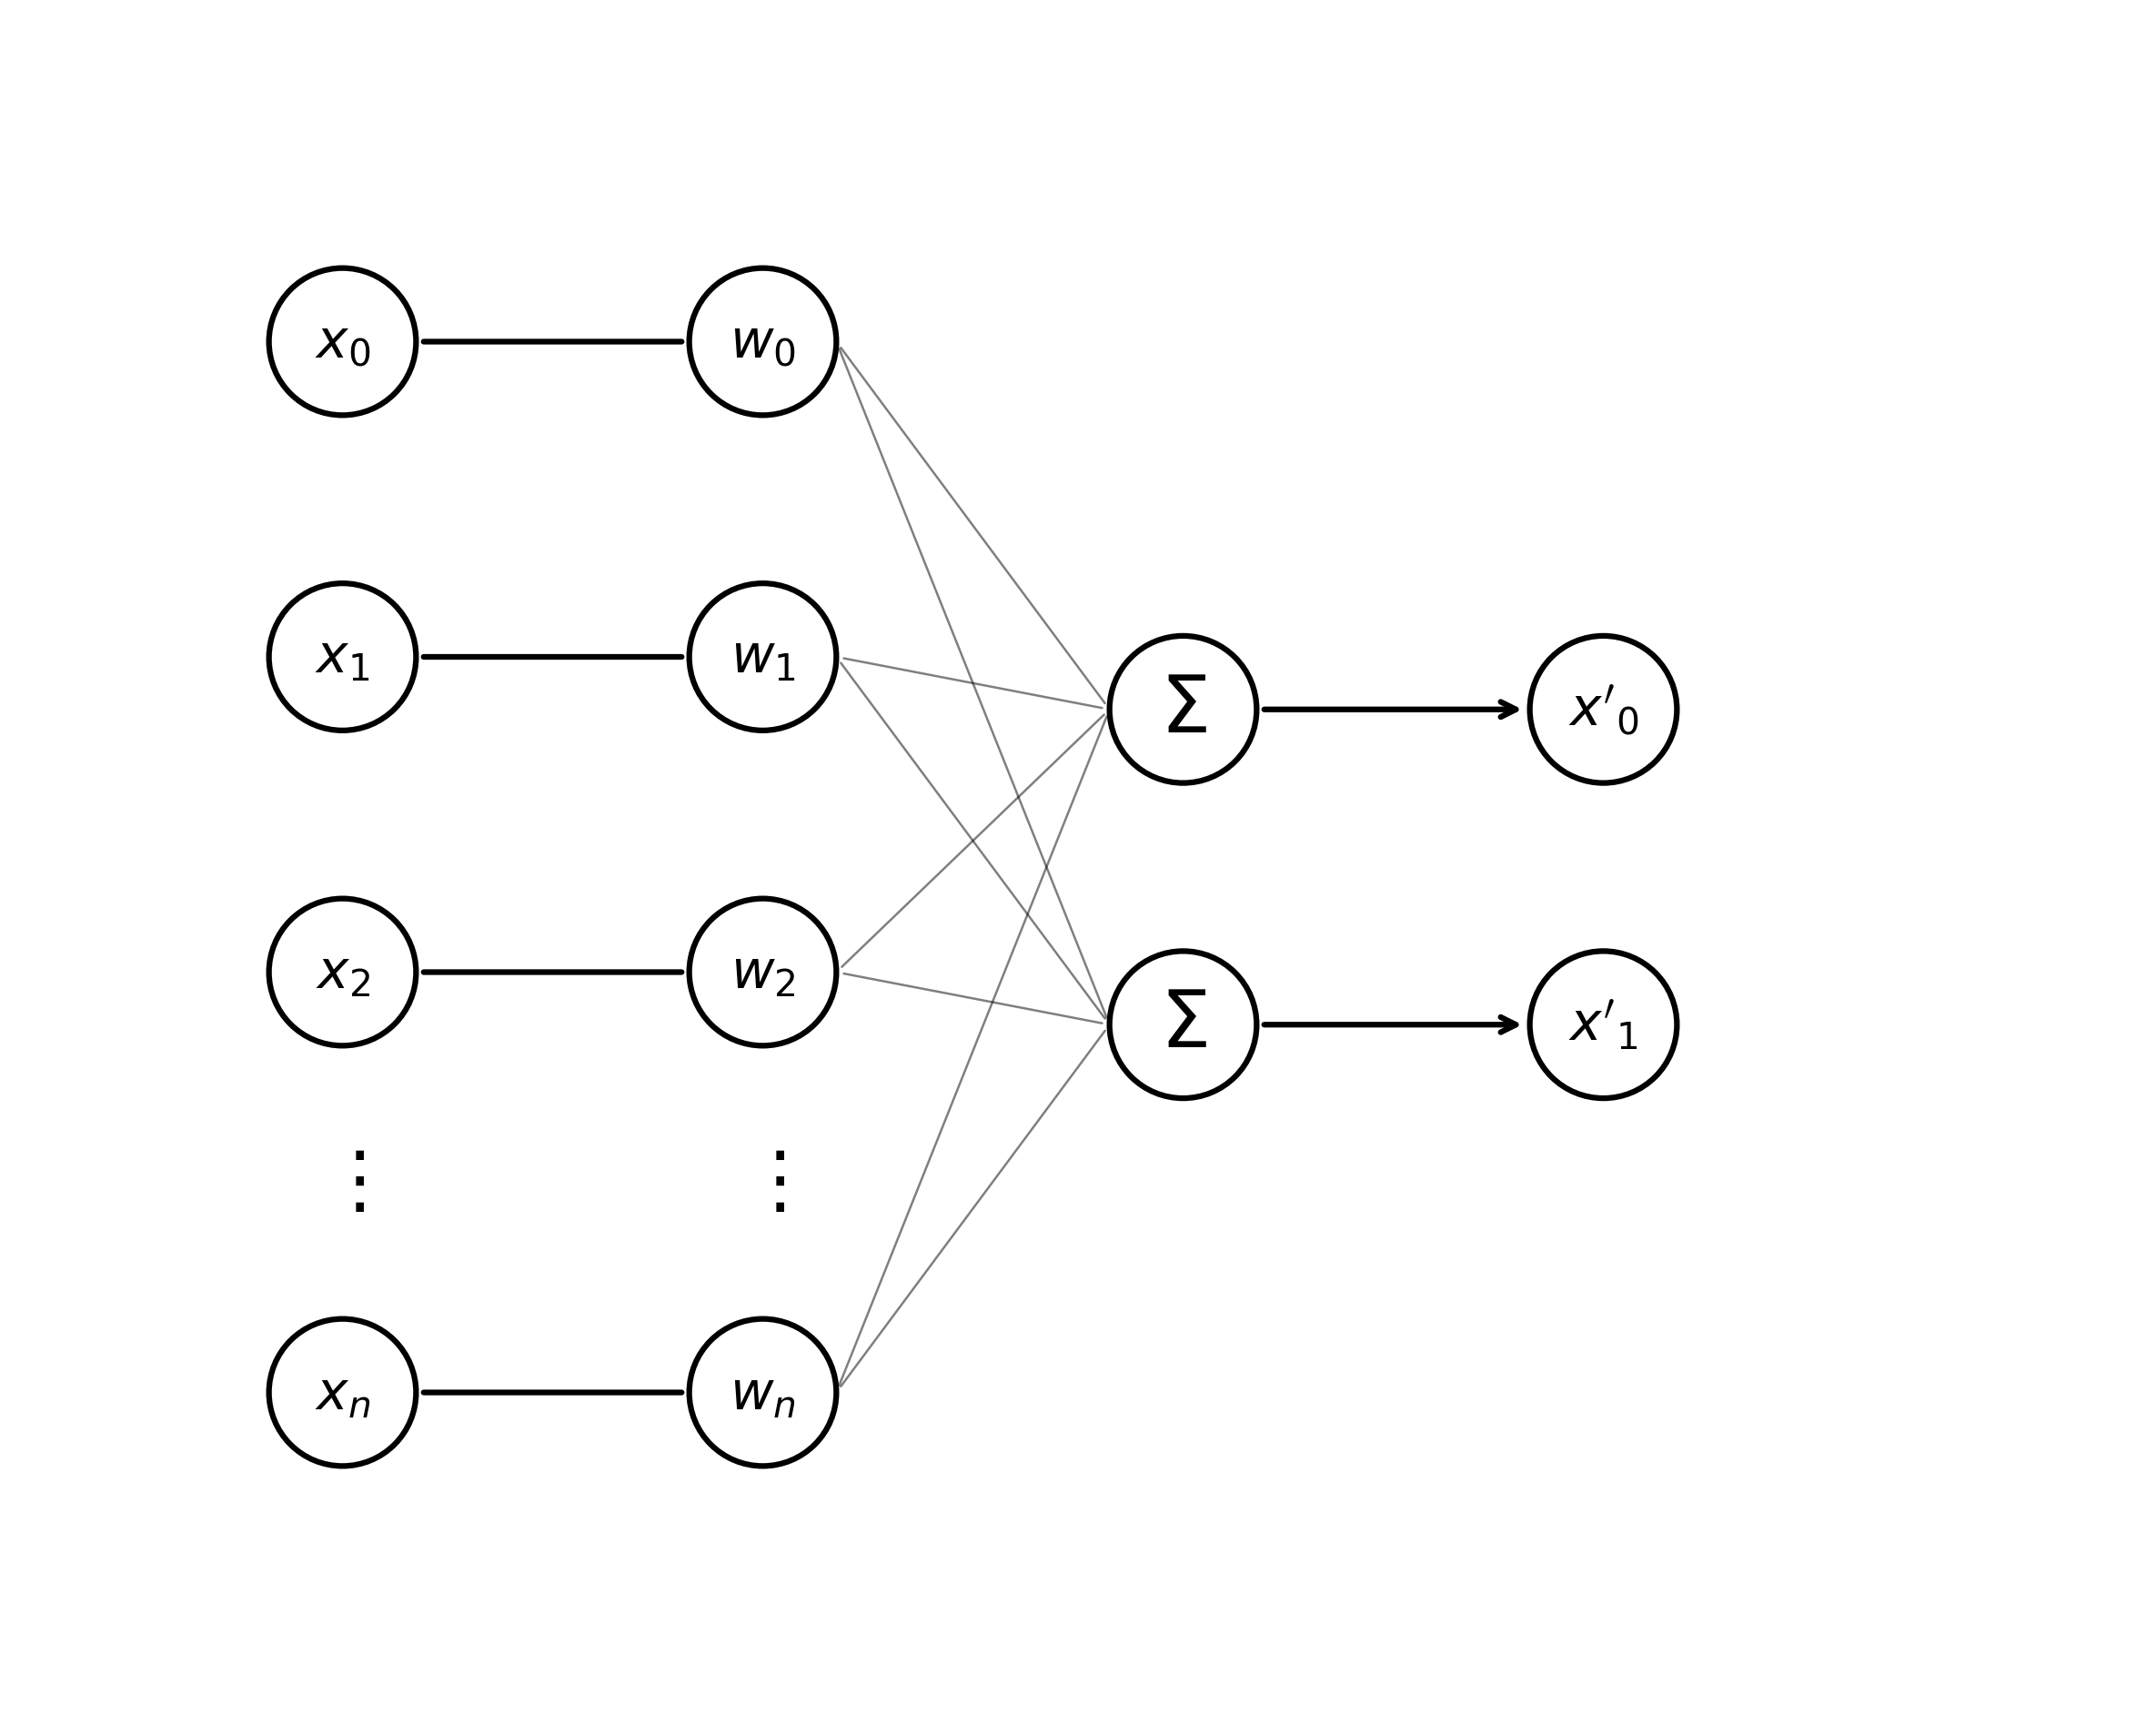

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
ax.set_xlim(-1, 9)
ax.set_ylim(-1, 7)
ax.set_aspect('equal')
ax.axis('off')

r = 0.35  # node radius

# --- Positions ---
input_x = 0.5
weight_x = 2.5
sum_x = 4.5
out_x = 6.5

input_ys  = [5.5, 4.0, 2.5, 0.5]   # x0, x1, x2, xn
weight_ys = [5.5, 4.0, 2.5, 0.5]   # w0, w1, w2, wn
output_ys = [3.75, 2.25]             # x'0, x'1
sum_ys    = [3.75, 2.25]             # one summation per output

# --- Helper: draw a circle with text ---
def draw_node(x, y, text, fontsize=14):
    circle = plt.Circle((x, y), r, fill=False, edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, text, ha='center', va='center', fontsize=fontsize, zorder=4)

# --- Draw input nodes ---
input_labels = [r'$x_0$', r'$x_1$', r'$x_2$', r'$x_n$']
for y, label in zip(input_ys, input_labels):
    draw_node(input_x, y, label)
ax.text(input_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw weight nodes ---
weight_labels = [r'$w_0$', r'$w_1$', r'$w_2$', r'$w_n$']
for y, label in zip(weight_ys, weight_labels):
    draw_node(weight_x, y, label)
ax.text(weight_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw summation nodes ---
for y in sum_ys:
    draw_node(sum_x, y, r'$\Sigma$', fontsize=21)

# --- Draw output nodes ---
output_labels = [r"$x'_0$", r"$x'_1$"]
for y, label in zip(output_ys, output_labels):
    draw_node(out_x, y, label)

# --- Connections: input -> weight (one-to-one) ---
for iy, wy in zip(input_ys, weight_ys):
    ax.annotate('', xy=(weight_x - r, wy), xytext=(input_x + r, iy),
                arrowprops=dict(arrowstyle='-', color='black', lw=1.5))

# --- Connections: weight -> summation (all-to-all, fully connected) ---
for wy in weight_ys:
    for sy in sum_ys:
        ax.annotate('', xy=(sum_x - r, sy), xytext=(weight_x + r, wy),
                    arrowprops=dict(arrowstyle='-', color='black', lw=0.6, alpha=0.5))

# --- Connections: summation -> output (one-to-one) ---
for sy, oy in zip(sum_ys, output_ys):
    ax.annotate('', xy=(out_x - r, oy), xytext=(sum_x + r, sy),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

plt.tight_layout()
plt.show()

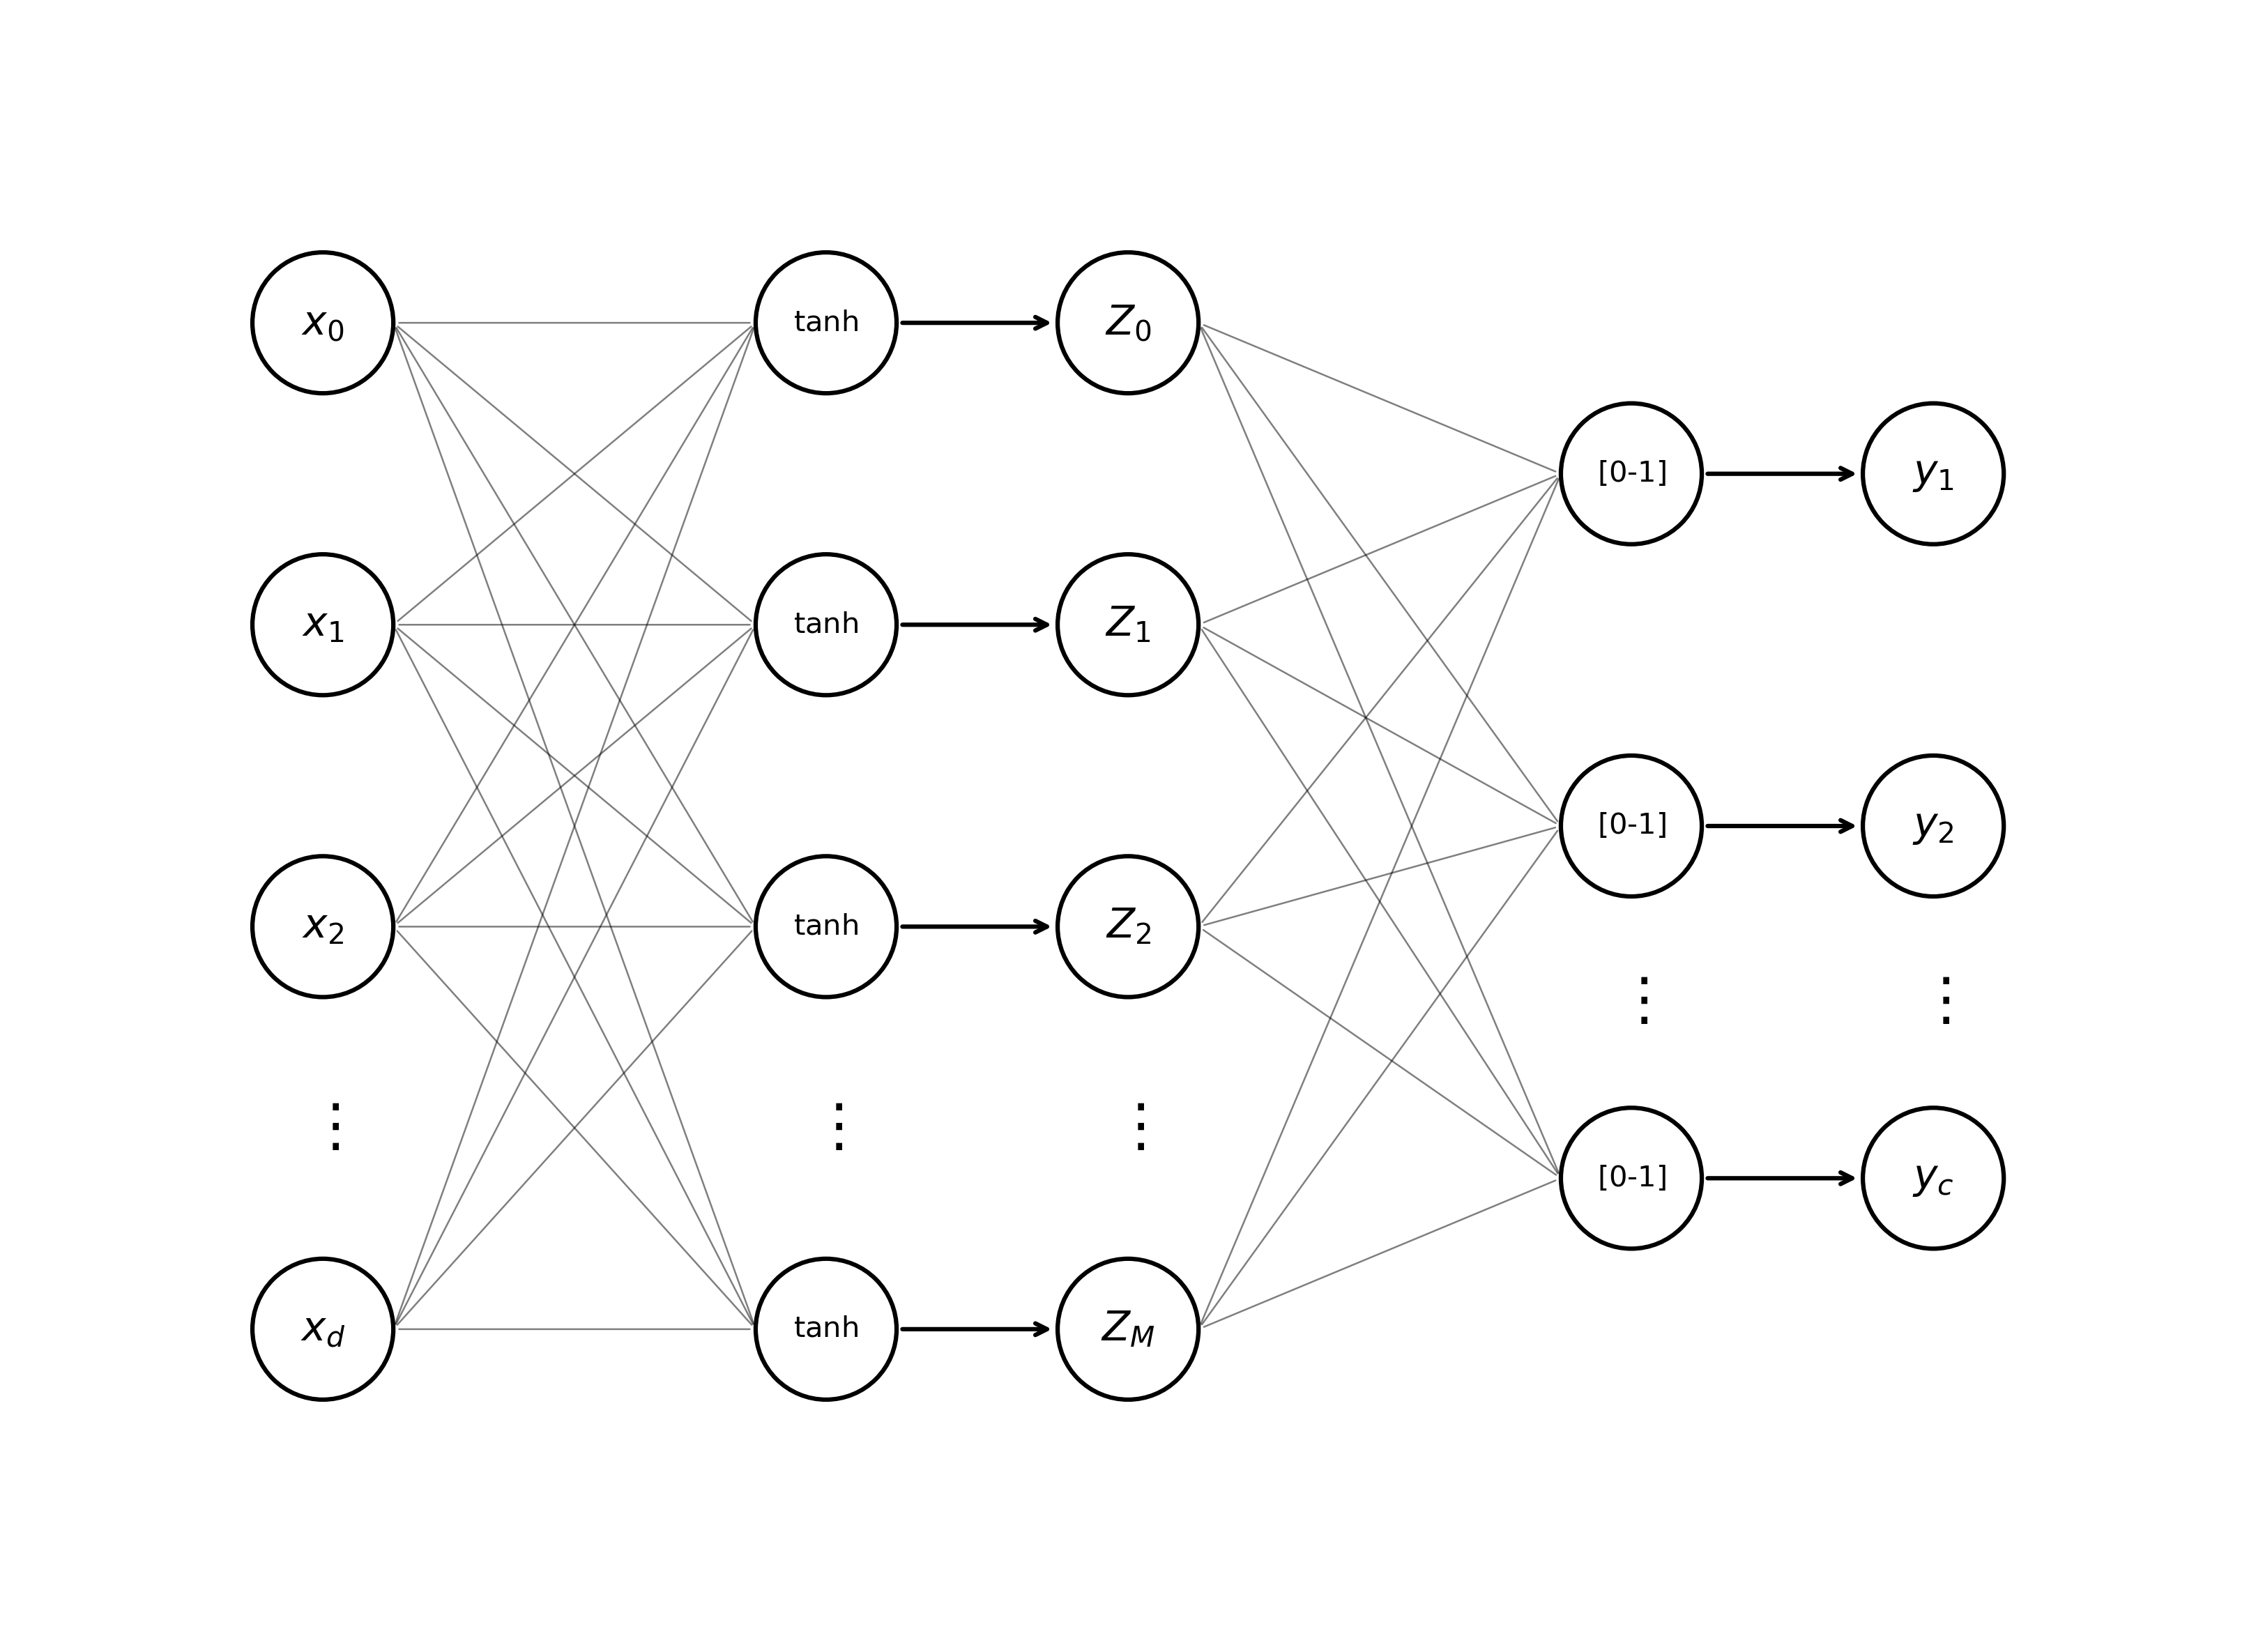

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=300)
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 7)
ax.set_aspect('equal')
ax.axis('off')

r = 0.35  # node radius

# --- Positions ---
input_x = 0.5
tanh_x = 3.0
z_x = 4.5
sig_x = 7.0
out_x = 8.5

input_ys = [5.5, 4.0, 2.5, 0.5]       # x0, x1, x2, xd
tanh_ys  = [5.5, 4.0, 2.5, 0.5]       # tanh nodes
z_ys     = [5.5, 4.0, 2.5, 0.5]       # Z0, Z1, Z2, ZM
sig_ys   = [4.75, 3.0, 1.25]           # [0-1] nodes
out_ys   = [4.75, 3.0, 1.25]           # y1, y2, yc

# --- Helper: draw a circle with text ---
def draw_node(x, y, text, fontsize=14):
    circle = plt.Circle((x, y), r, fill=False, edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, text, ha='center', va='center', fontsize=fontsize, zorder=4)

# --- Draw input nodes ---
input_labels = [r'$x_0$', r'$x_1$', r'$x_2$', r'$x_d$']
for y, label in zip(input_ys, input_labels):
    draw_node(input_x, y, label)
ax.text(input_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw tanh nodes ---
for y in tanh_ys:
    draw_node(tanh_x, y, r'$\tanh$', fontsize=10)
ax.text(tanh_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw hidden (Z) nodes ---
z_labels = [r'$Z_0$', r'$Z_1$', r'$Z_2$', r'$Z_M$']
for y, label in zip(z_ys, z_labels):
    draw_node(z_x, y, label)
ax.text(z_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw [0-1] nodes ---
for y in sig_ys:
    draw_node(sig_x, y, r'$[0\text{-}1]$', fontsize=10)
ax.text(sig_x, 2.125, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw output nodes ---
out_labels = [r'$y_1$', r'$y_2$', r'$y_c$']
for y, label in zip(out_ys, out_labels):
    draw_node(out_x, y, label)
ax.text(out_x, 2.125, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Connections: input -> tanh (all-to-all) ---
for iy in input_ys:
    for ty in tanh_ys:
        ax.annotate('', xy=(tanh_x - r, ty), xytext=(input_x + r, iy),
                    arrowprops=dict(arrowstyle='-', color='black', lw=0.6, alpha=0.5))

# --- Connections: tanh -> Z (one-to-one) ---
for ty, zy in zip(tanh_ys, z_ys):
    ax.annotate('', xy=(z_x - r, zy), xytext=(tanh_x + r, ty),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# --- Connections: Z -> [0-1] (all-to-all) ---
for zy in z_ys:
    for sy in sig_ys:
        ax.annotate('', xy=(sig_x - r, sy), xytext=(z_x + r, zy),
                    arrowprops=dict(arrowstyle='-', color='black', lw=0.6, alpha=0.5))

# --- Connections: [0-1] -> y (one-to-one) ---
for sy, oy in zip(sig_ys, out_ys):
    ax.annotate('', xy=(out_x - r, oy), xytext=(sig_x + r, sy),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

plt.tight_layout()
plt.show()

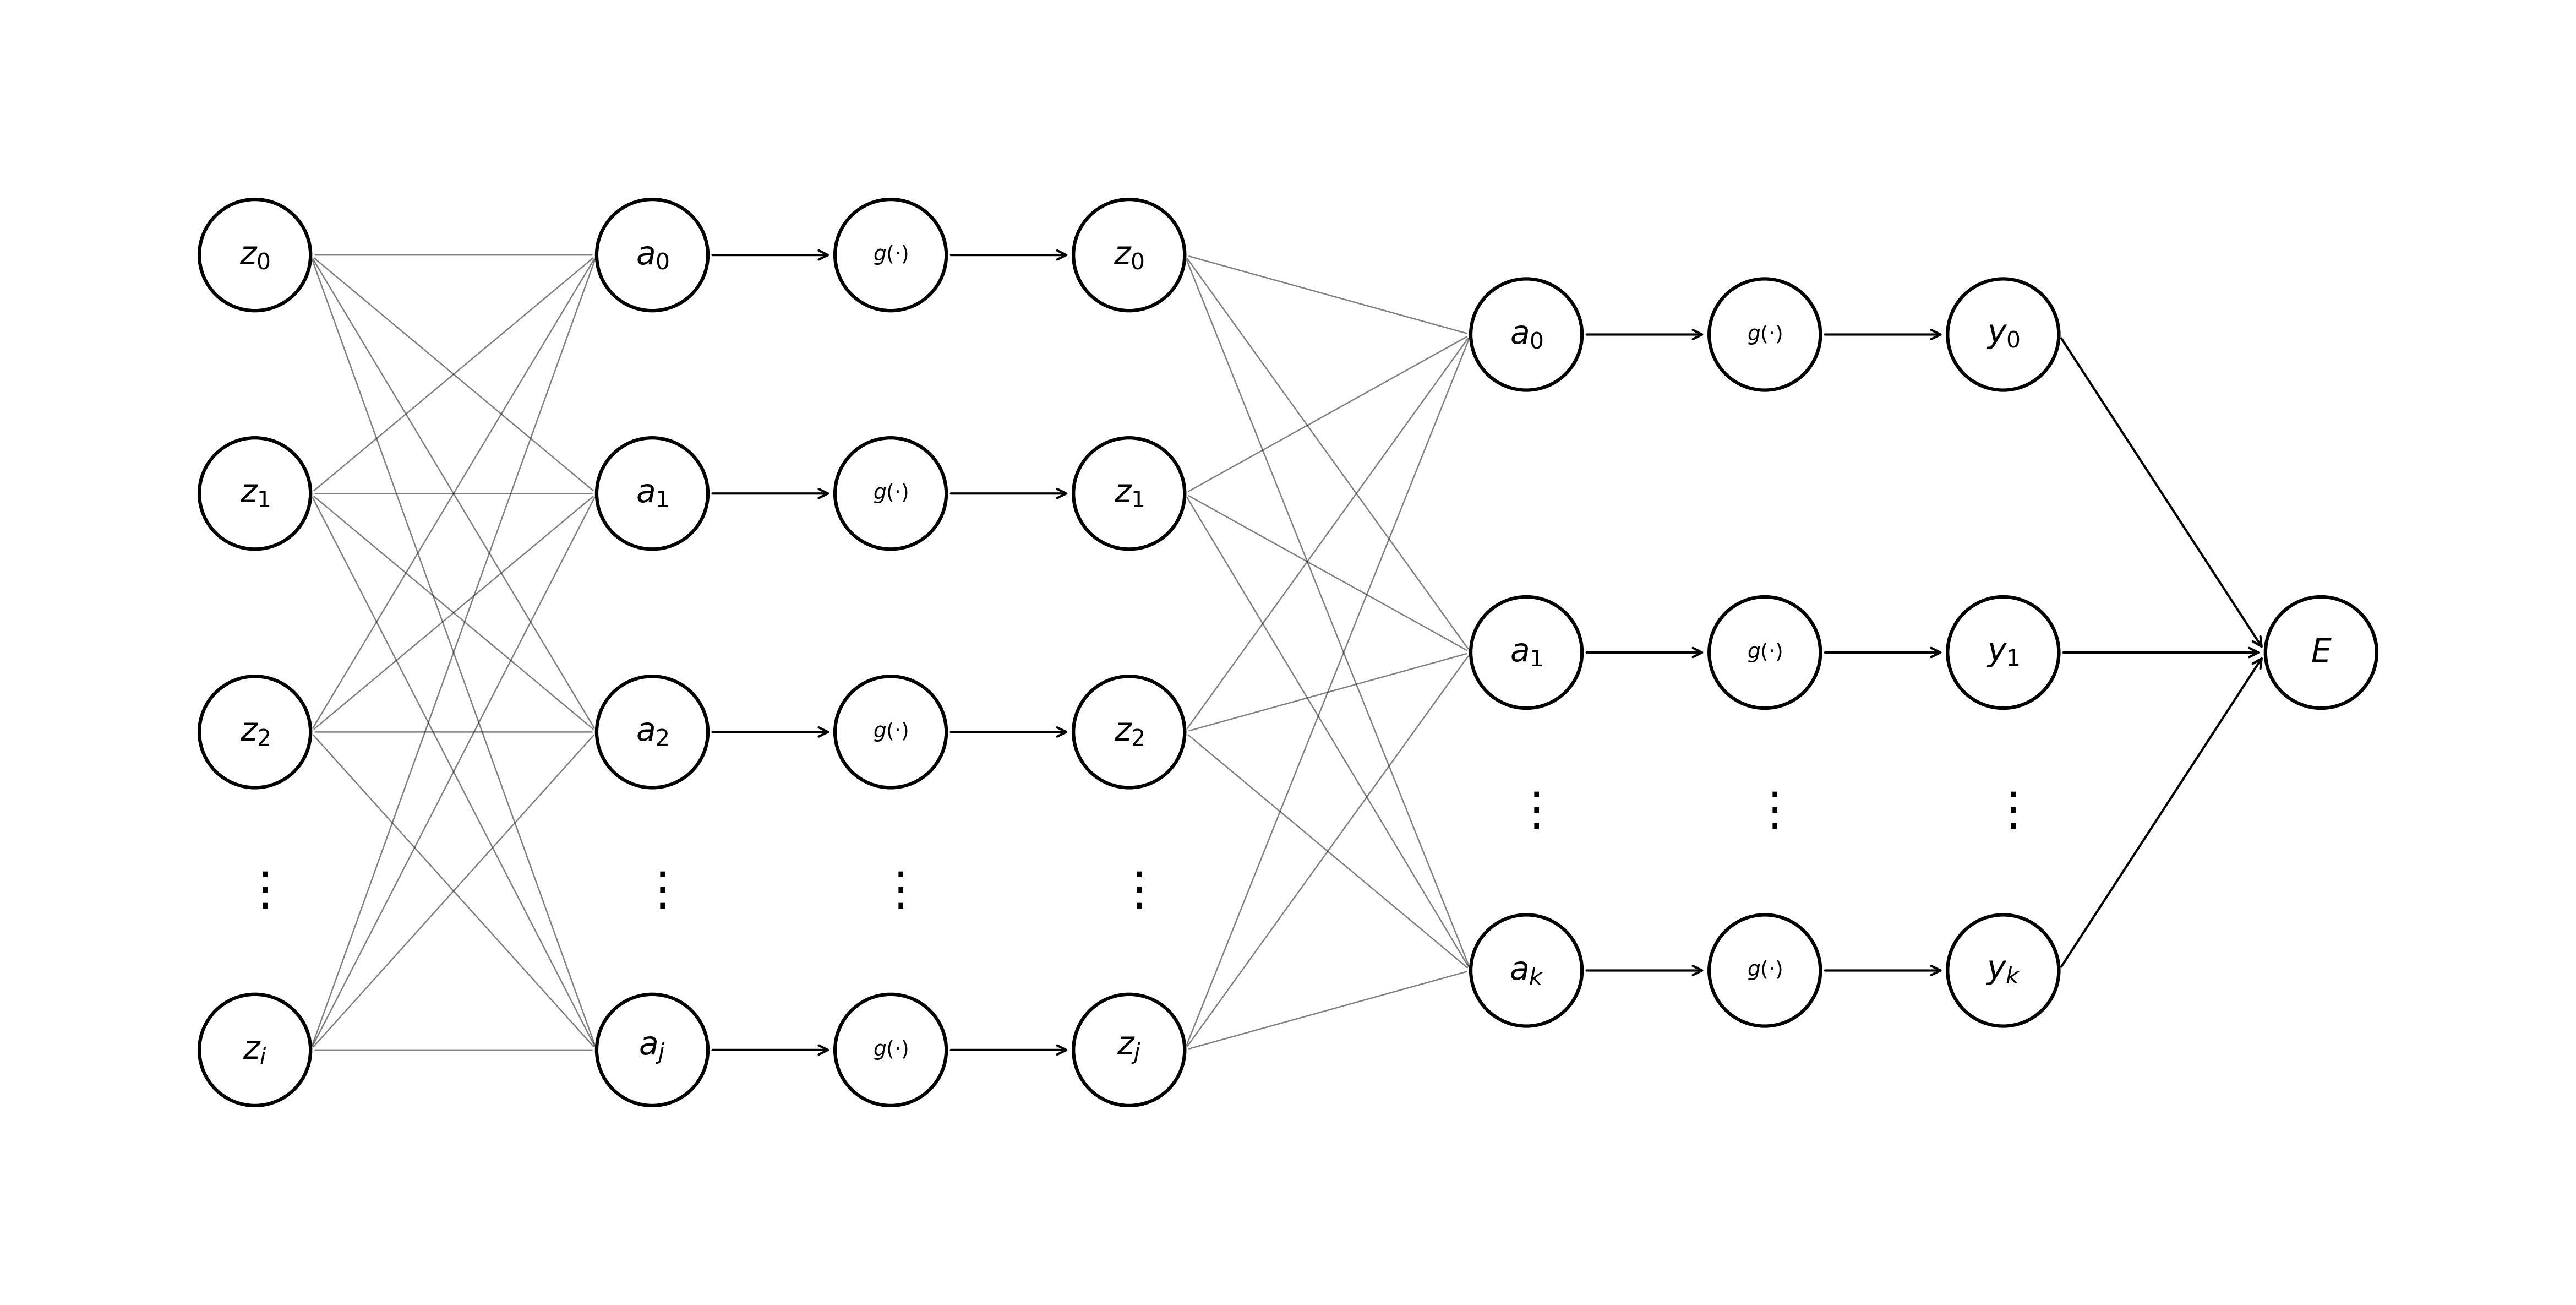

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=300)
ax.set_xlim(-1, 15)
ax.set_ylim(-1, 7)
ax.set_aspect('equal')
ax.axis('off')

r = 0.35  # node radius

# --- Positions ---
input_x = 0.5
a_x = 3.0
tanh_x = 4.5
z_x = 6.0
a2_x = 8.5
tanh2_x = 10.0
y_x = 11.5
e_x = 13.5

input_ys = [5.5, 4.0, 2.5, 0.5]       # z0, z1, z2, zi
a_ys     = [5.5, 4.0, 2.5, 0.5]       # a0, a1, a2, aj
tanh_ys  = [5.5, 4.0, 2.5, 0.5]       # g(.) nodes
z_ys     = [5.5, 4.0, 2.5, 0.5]       # z0, z1, z2, zj
a2_ys    = [5.0, 3.0, 1.0]            # a0, a1, ak
tanh2_ys = [5.0, 3.0, 1.0]            # g(.) nodes
y_ys     = [5.0, 3.0, 1.0]            # y0, y1, yk
e_ys     = [3.0]                       # E

# --- Helper: draw a circle with text ---
def draw_node(x, y, text, fontsize=14):
    circle = plt.Circle((x, y), r, fill=False, edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, text, ha='center', va='center', fontsize=fontsize, zorder=4)

# --- Draw input nodes (z_i) ---
input_labels = [r'$z_0$', r'$z_1$', r'$z_2$', r'$z_i$']
for y, label in zip(input_ys, input_labels):
    draw_node(input_x, y, label)
ax.text(input_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw pre-activation (a_j) nodes ---
a_labels = [r'$a_0$', r'$a_1$', r'$a_2$', r'$a_j$']
for y, label in zip(a_ys, a_labels):
    draw_node(a_x, y, label)
ax.text(a_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw g(.) nodes (hidden) ---
for y in tanh_ys:
    draw_node(tanh_x, y, r'$g(\cdot)$', fontsize=9)
ax.text(tanh_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw hidden (z_j) nodes ---
z_labels = [r'$z_0$', r'$z_1$', r'$z_2$', r'$z_j$']
for y, label in zip(z_ys, z_labels):
    draw_node(z_x, y, label)
ax.text(z_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw output pre-activation (a_k) nodes ---
a2_labels = [r'$a_0$', r'$a_1$', r'$a_k$']
for y, label in zip(a2_ys, a2_labels):
    draw_node(a2_x, y, label)
ax.text(a2_x, 2.0, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw output g(.) nodes ---
for y in tanh2_ys:
    draw_node(tanh2_x, y, r'$g(\cdot)$', fontsize=9)
ax.text(tanh2_x, 2.0, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw output (y_k) nodes ---
y_labels = [r'$y_0$', r'$y_1$', r'$y_k$']
for y, label in zip(y_ys, y_labels):
    draw_node(y_x, y, label)
ax.text(y_x, 2.0, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw error node ---
draw_node(e_x, e_ys[0], r'$E$', fontsize=14)

# --- Connections: input -> a (all-to-all) ---
for iy in input_ys:
    for ay in a_ys:
        ax.annotate('', xy=(a_x - r, ay), xytext=(input_x + r, iy),
                    arrowprops=dict(arrowstyle='-', color='black', lw=0.6, alpha=0.5))

# --- Connections: a -> g(.) (one-to-one) ---
for ay, ty in zip(a_ys, tanh_ys):
    ax.annotate('', xy=(tanh_x - r, ty), xytext=(a_x + r, ay),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.0))

# --- Connections: g(.) -> z (one-to-one) ---
for ty, zy in zip(tanh_ys, z_ys):
    ax.annotate('', xy=(z_x - r, zy), xytext=(tanh_x + r, ty),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.0))

# --- Connections: z -> a2 (all-to-all) ---
for zy in z_ys:
    for ay in a2_ys:
        ax.annotate('', xy=(a2_x - r, ay), xytext=(z_x + r, zy),
                    arrowprops=dict(arrowstyle='-', color='black', lw=0.6, alpha=0.5))

# --- Connections: a2 -> g(.) (one-to-one) ---
for ay, ty in zip(a2_ys, tanh2_ys):
    ax.annotate('', xy=(tanh2_x - r, ty), xytext=(a2_x + r, ay),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.0))

# --- Connections: g(.) -> y (one-to-one) ---
for ty, yy in zip(tanh2_ys, y_ys):
    ax.annotate('', xy=(y_x - r, yy), xytext=(tanh2_x + r, ty),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.0))

# --- Connections: y -> E (all-to-one) ---
for yy in y_ys:
    ax.annotate('', xy=(e_x - r, e_ys[0]), xytext=(y_x + r, yy),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.0))

plt.tight_layout()
plt.show()

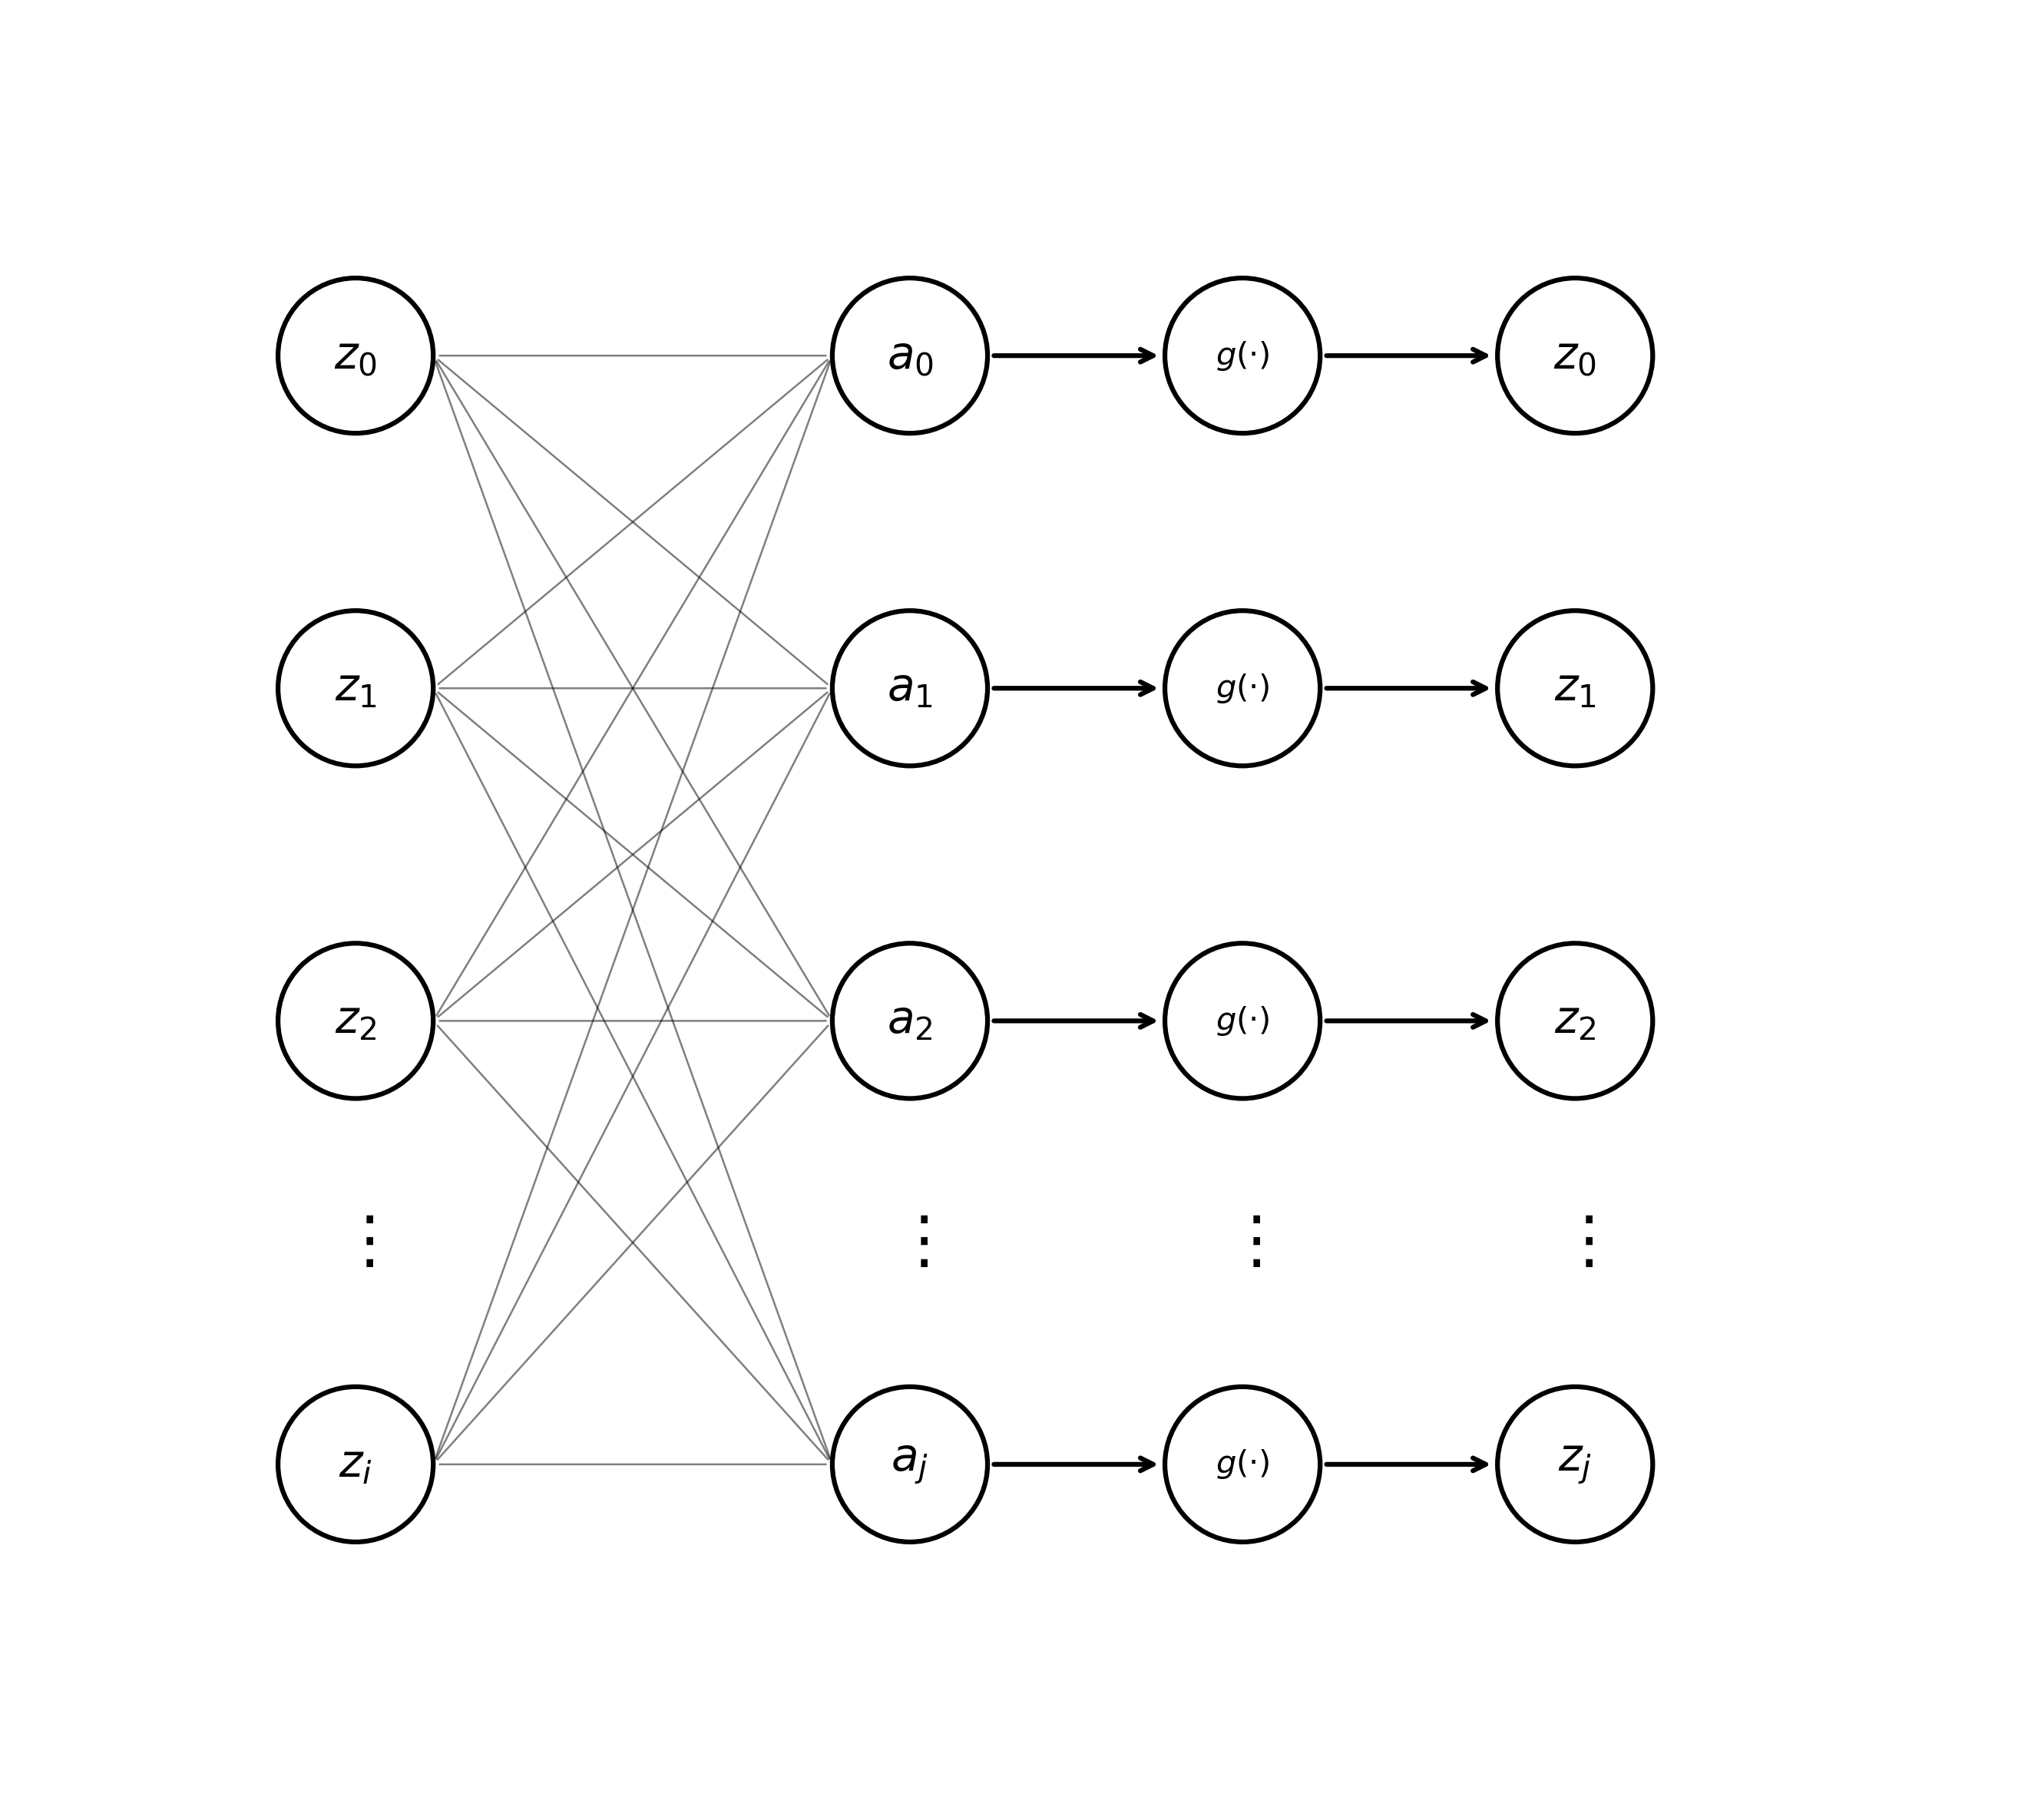

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
ax.set_xlim(-1, 8)
ax.set_ylim(-1, 7)
ax.set_aspect('equal')
ax.axis('off')

r = 0.35  # node radius

# --- Positions ---
input_x = 0.5
a_x = 3.0
tanh_x = 4.5
z_x = 6.0

input_ys = [5.5, 4.0, 2.5, 0.5]       # z0, z1, z2, zi
a_ys     = [5.5, 4.0, 2.5, 0.5]       # a0, a1, a2, aj
tanh_ys  = [5.5, 4.0, 2.5, 0.5]       # tanh nodes
z_ys     = [5.5, 4.0, 2.5, 0.5]       # z0, z1, z2, zj

# --- Helper: draw a circle with text ---
def draw_node(x, y, text, fontsize=14):
    circle = plt.Circle((x, y), r, fill=False, edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, text, ha='center', va='center', fontsize=fontsize, zorder=4)

# --- Draw input nodes (z_i) ---
input_labels = [r'$z_0$', r'$z_1$', r'$z_2$', r'$z_i$']
for y, label in zip(input_ys, input_labels):
    draw_node(input_x, y, label)
ax.text(input_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw pre-activation (a_j) nodes ---
a_labels = [r'$a_0$', r'$a_1$', r'$a_2$', r'$a_j$']
for y, label in zip(a_ys, a_labels):
    draw_node(a_x, y, label)
ax.text(a_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw tanh nodes ---
for y in tanh_ys:
    draw_node(tanh_x, y, r'$g(\cdot)$', fontsize=10)
ax.text(tanh_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw output (z_j) nodes ---
z_labels = [r'$z_0$', r'$z_1$', r'$z_2$', r'$z_j$']
for y, label in zip(z_ys, z_labels):
    draw_node(z_x, y, label)
ax.text(z_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Connections: input -> a (all-to-all) ---
for iy in input_ys:
    for ay in a_ys:
        ax.annotate('', xy=(a_x - r, ay), xytext=(input_x + r, iy),
                    arrowprops=dict(arrowstyle='-', color='black', lw=0.6, alpha=0.5))

# --- Connections: a -> tanh (one-to-one) ---
for ay, ty in zip(a_ys, tanh_ys):
    ax.annotate('', xy=(tanh_x - r, ty), xytext=(a_x + r, ay),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# --- Connections: tanh -> Z (one-to-one) ---
for ty, zy in zip(tanh_ys, z_ys):
    ax.annotate('', xy=(z_x - r, zy), xytext=(tanh_x + r, ty),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

plt.tight_layout()
plt.show()